<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/CNN/exam/Category3_cats-vs-dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# =======================================================================================================
# PROBLEM C3
#
# Build a CNN based classifier for Cats vs Dogs dataset.
# Your input layer should accept 150x150 with 3 bytes color as the input shape.
# This is unlabeled data, use ImageDataGenerator to automatically label it.
# Don't use lambda layers in your model.
#
# The dataset used in this problem is originally published in https://www.kaggle.com/c/dogs-vs-cats/data
#
# Desired accuracy and validation_accuracy > 72%
# ========================================================================================================

import tensorflow as tf
import urllib.request
import zipfile
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, _, logs={}):
        if logs.get('accuracy') > .80 and logs.get('val_accuracy') > .80:
          print("Cancelling training since val accuracy is greater than 80%")
          self.model.stop_training = True

def solution_model():
  data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/cats_and_dogs.zip'
  urllib.request.urlretrieve(data_url, 'cats_and_dogs.zip')
  local_file = 'cats_and_dogs.zip'
  zip_ref = zipfile.ZipFile(local_file, 'r')
  zip_ref.extractall('data/')
  zip_ref.close()

  BASE_DIR = 'data/cats_and_dogs_filtered'
  train_dir = os.path.join(BASE_DIR, 'train')
  validation_dir = os.path.join(BASE_DIR, 'validation')

  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )
  val_datagen = ImageDataGenerator(rescale=1./255)

  # YOUR IMAGE SIZE SHOULD BE 150x150
  # Make sure you used "binary"
  train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(150, 150),
      batch_size=20,
      class_mode='binary'
  )
  val_generator = val_datagen.flow_from_directory(
      validation_dir,
      target_size=(150,150),
      batch_size=20,
      class_mode='binary'
  )

  #Derive label details
  class_dict = train_generator.class_indices # returns ie. {'cat': 0, 'dog': 1}
  print(class_dict)
  num_classes = len(class_dict)

  model = tf.keras.models.Sequential([
  # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150,150,3)), #strides= 2, padding='same',
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  # tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid') #num of units is 1 since we're using sigmoid activation
  ])

  model.summary()

  #callbacks
  callback = myCallback()
  MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5',monitor='val_accuracy', mode='auto',save_best_only=True,save_weights_only=False,verbose=1)
  RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=3, verbose=1,mode="auto",min_lr=0.000000001)
  ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=1e-4,patience=5,verbose=1,start_from_epoch=5)


  #Train and compile model
  lr = 0.0001 #1e-5
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1)
  model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

  tf.keras.backend.clear_session()
  history = model.fit(train_generator, validation_data=val_generator, epochs=100, callbacks=[callback, MCP, RLP, ES]) #ES

  return model


# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_model()
    model.save("mymodel.h5")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       147584    
               

KeyboardInterrupt: 

In [1]:
# import tensorflow as tf
# import urllib.request
# import zipfile
# import os
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow import keras
# import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')

In [20]:
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, _, logs={}):
#         if logs.get('accuracy') > .80 and logs.get('val_accuracy') > .80:
#           print("Cancelling training since val accuracy is greater than 80%")
#           self.model.stop_training = True

In [3]:
# data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/cats_and_dogs.zip'
# urllib.request.urlretrieve(data_url, 'cats_and_dogs.zip')
# local_file = 'cats_and_dogs.zip'
# zip_ref = zipfile.ZipFile(local_file, 'r')
# zip_ref.extractall('data/')
# zip_ref.close()

In [4]:
# BASE_DIR = 'data/cats_and_dogs_filtered'
# train_dir = os.path.join(BASE_DIR, 'train')
# validation_dir = os.path.join(BASE_DIR, 'validation')

In [5]:
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# # YOUR IMAGE SIZE SHOULD BE 150x150
# # Make sure you used "binary"
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(150, 150),
#     batch_size=20,
#     class_mode='binary'
# )
# val_generator = val_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(150,150),
#     batch_size=20,
#     class_mode='binary'
# )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# #Derive label details
# class_dict = train_generator.class_indices # returns ie. {'cat': 0, 'dog': 1}
# print(class_dict)
# num_classes = len(class_dict)

{'cats': 0, 'dogs': 1}


In [44]:
# model = tf.keras.models.Sequential([
#     # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150,150,3)), #strides= 2, padding='same',
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Flatten(),
#     # tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid') #num of units is 1 since we're using sigmoid activation
# ])

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [45]:
# #callbacks
# callback = myCallback()
# MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5',monitor='val_accuracy', mode='auto',save_best_only=True,save_weights_only=False,verbose=1)
# RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=3, verbose=1,mode="auto",min_lr=0.000000001)
# ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=1e-4,patience=5,verbose=1,start_from_epoch=5)


In [46]:
# #Train and compile model
# lr = 0.0001 #1e-5
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1)
# model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# tf.keras.backend.clear_session()
# history = model.fit(train_generator, validation_data=val_generator, epochs=100, callbacks=[callback, MCP, RLP, ES]) #ES

Epoch 1/100
  6/100 [>.............................] - ETA: 30s - loss: 0.6972 - accuracy: 0.4583

100/100 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.5100
Epoch 1: val_accuracy improved from -inf to 0.51800, saving model to bestmodel.h5
100/100 [==============================] - 20s 166ms/step - loss: 0.6939 - accuracy: 0.5100 - val_loss: 0.6900 - val_accuracy: 0.5180 - lr: 1.0000e-04
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.5405
Epoch 2: val_accuracy did not improve from 0.51800
100/100 [==============================] - 14s 136ms/step - loss: 0.6901 - accuracy: 0.5405 - val_loss: 0.6930 - val_accuracy: 0.5030 - lr: 1.0000e-04
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5550
Epoch 3: val_accuracy improved from 0.51800 to 0.59800, saving model to bestmodel.h5
100/100 [==============================] - 15s 150ms/step - loss: 0.6861 - accuracy: 0.5550 - val_loss: 0.6696 - val_accuracy: 0.5980 - lr: 1.0000e-04
Epoch 4/100
100/100 [=============================

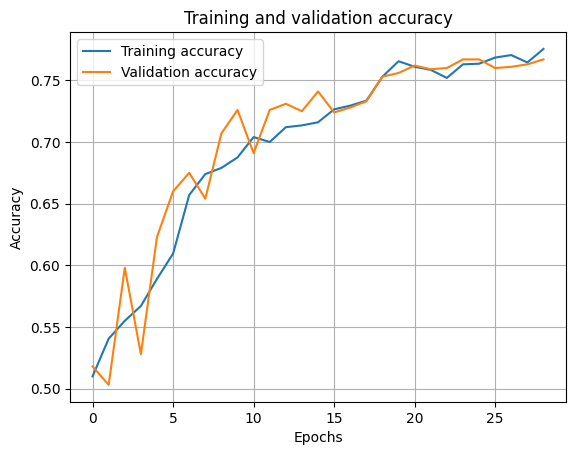

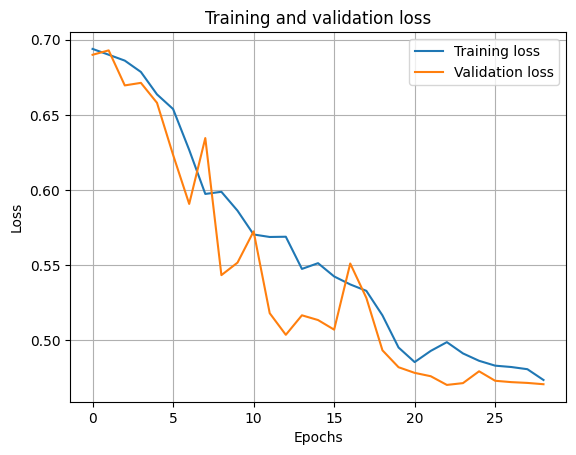

In [48]:
# %matplotlib inline
# %config InlineBackend.fugure_format = 'retina'
# def plot_loss_acc(history):
#   #-----------------------------------------------------------
#   # Retrieve a list of list results on training and test data
#   # sets for each training epoch
#   #-----------------------------------------------------------
#   acc      = history.history[     'accuracy' ]
#   val_acc  = history.history[ 'val_accuracy' ]
#   loss     = history.history[    'loss' ]
#   val_loss = history.history['val_loss' ]
#   epochs   = range(len(acc)) # Get number of epochs
#   #------------------------------------------------
#   # Plot training and validation accuracy per epoch
#   #------------------------------------------------
#   plt.plot  ( epochs,     acc, label='Training accuracy' )
#   plt.plot  ( epochs, val_acc, label='Validation accuracy' )
#   plt.title ('Training and validation accuracy')
#   plt.grid()
#   plt.legend()
#   plt.xlabel("Epochs")
#   plt.ylabel("Accuracy")
#   plt.figure()
#   #------------------------------------------------
#   # Plot training and validation loss per epoch
#   #------------------------------------------------
#   plt.plot  ( epochs,     loss, label='Training loss' )
#   plt.plot  ( epochs, val_loss, label='Validation loss' )
#   plt.grid()
#   plt.legend()
#   plt.xlabel("Epochs")
#   plt.ylabel("Loss")
#   plt.title ('Training and validation loss'   )

# # Plot training results
# plot_loss_acc(history)
